<a href="https://colab.research.google.com/github/ayushi-006/pytorch/blob/main/Neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # NEURAL NETWORK CLASSIFICATION WITH PyTorch

 A classification problem involves predicting whether something is one thing or another.

## 1. **Make classification data and get it read**

In [ ]:
!pip install scikit-learn


In [ ]:
import sklearn
print(sklearn.__version__)


1.6.1


In [ ]:
import sklearn
from sklearn.datasets import make_circles

n_samples = 1000  #Make 1000 samples

X, y = make_circles(n_samples,  #create circles
                    noise = 0.03,
                    random_state =42)

In [ ]:
print(f"First 5 X features:\n{X[:5]}")
print(f"\nFirst 5 y labels:\n{y[:5]}")

First 5 X features:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

First 5 y labels:
[1 1 1 1 0]


In [ ]:
!pip install pandas
import pandas
print(pandas.__version__)
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})
circles.head(10)


2.2.2


,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [ ]:
# Check different labels
circles.label.value_counts()


,count
label,
1,500
0,500


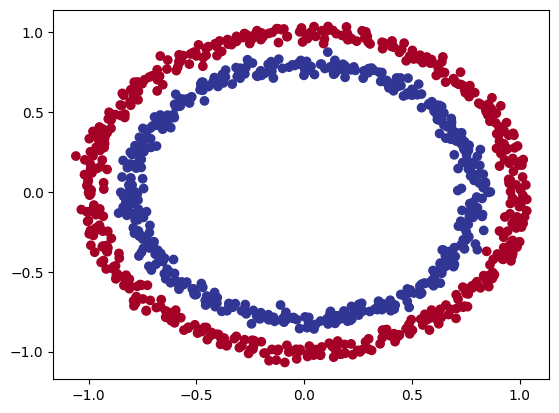

In [ ]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

Let's find out how we could build a PyTorch neural network to classify dots into red (0) or blue (1).m

## Input and output shapes

![image.png](attachment:ff1191eb-41e4-4eed-97a7-b85409f4f65e.png)

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
#View the first example of the features and lables

X_sample = X[0]
y_sample = y[0]

print(X_sample)
print(X_sample.shape)
print(y_sample)
print(y_sample.shape)



[0.75424625 0.23148074]
(2,)
1
()


# Turn data into tensors and cretae train and test splits

In [ ]:
import torch
torch.__version__

'2.6.0+cu124'

In [ ]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [ ]:
# Turn data into tensors
# Otherwise this causes issues with computations later on
import torch
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# View the first five samples
X[:5], y[:5]


(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=42) # make the random split reproducible

len(X_train), len(X_test), len(y_train), len(y_test)



(800, 200, 800, 200)

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. **Building a Model**
* Setting up device agnostic code (so our model can run on CPU or GPU if it's available).
* Constructing a model by subclassing `nn.Module`.
* Defining a loss function and optimizer.
* Creating a training loop (this'll be in the next section).



In [ ]:
import torch
torch.cuda.is_available()


True

In [ ]:
import torch
from torch import nn

#Make devide agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

from types import MethodDescriptorType
We have to create a models that:
* Subclasses `nn.module`
* Create two `nn.Linear()` layers
* Defines a `forward()` MethodDescriptorType



In [ ]:
X_train.shape

torch.Size([800, 2])

In [ ]:
# CONSTRUCT A MODEL

class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # Create a nn.linear layer
    self.layer_1 = nn.Linear(in_features=2, out_features=5)
    self.layer_2 = nn.Linear(in_features=5, out_features=1)
  # defining a forward() model
  def forward(self, x):
    return self.layer_2(self.layer_1(x))  # x --> layer_1 --> layer_2 --> output

model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
next(model_0.parameters()).device

device(type='cuda', index=0)

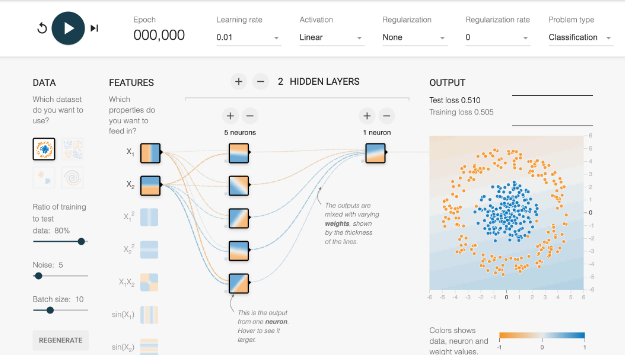

You can also do the same as above using nn.Sequential.

`nn.Sequential` performs a forward pass computation of the input data through the layers in the order they appear.

In [ ]:

# Replicate CircleModelV0 with nn.Sequential
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0


Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.6078,  0.2301],
                      [ 0.6162,  0.1139],
                      [-0.0208,  0.1612],
                      [-0.6360, -0.3275],
                      [-0.2620,  0.1399]], device='cuda:0')),
             ('0.bias',
              tensor([ 0.2905, -0.4775,  0.0759, -0.5202,  0.6674], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.2995,  0.0699, -0.2916, -0.1599, -0.3283]], device='cuda:0')),
             ('1.bias', tensor([-0.2382], device='cuda:0'))])

Looks much simpler than subclassing nn.Module, why not just always use nn.Sequential?

> `nn.Sequential` is fantastic for straight-forward computations, however, as the namespace says, it always runs in sequential order.

> So if you'd like something else to happen (rather than just straight-forward sequential computation) you'll want to define your own custom `nn.Module`
subclass.

In [ ]:
# Make predictions with the model
with torch.inference_mode():
     untrained_preds = model_0(X_test.to(device))
     print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
     print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
     print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
     print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([[-0.4750],
        [-0.3013],
        [-0.6484],
        [-0.4270],
        [-0.2011],
        [-0.0985],
        [ 0.0359],
        [ 0.0846],
        [-0.6670],
        [-0.2848]], device='cuda:0')

First 10 test labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### Set up loss function and Optimizer

1. For Regression --> MAE, MSE
2. For Classification -->  Binary cross entropy

PyTorch has two binary cross entropy implementations:

`torch.nn.BCELoss()` - Creates a loss function that measures the binary cross entropy between the target (label) and input (features).
`torch.nn.BCEWithLogitsLoss()` - This is the same as above except it has a sigmoid layer (nn.Sigmoid) built-in (we'll see what this means soon). The documentation for torch.nn.BCEWithLogitsLoss() states that it's more numerically stable than using torch.nn.BCELoss() after a nn.Sigmoid layer.

For Optimizer --> SGD, ADAM Optimizer

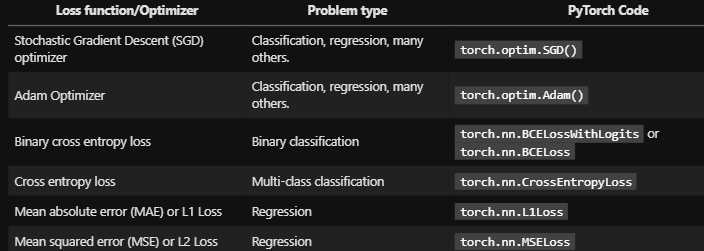

In [ ]:
# SET UP THE LOSS FUNCTION
# loss_fn = nn.BCELoss() # BCELoss = no sigmoid built-in
loss_fn = torch.nn.BCEWithLogitsLoss()        #built-in sigmoid

#CREATE AN OPTIMIZER
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

An evaluation metric can be used to offer another perspective on how your model is going.

If a loss function measures how wrong your model is, I like to think of evaluation metrics as measuring how right it is.

In [ ]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

## 3. **TRAIN MODEL**
PyTorch training loop steps
1. Forward pass
2. Calculate the loss
3. Zero gradients
4. Perform backpropagation on the loss
5. Step the optimizer (gradient descent)


## Going from raw model outputs to predicted labels (logits -> prediction probabilities -> prediction labels)

In [ ]:
# View the frist 5 outputs of the forward pass on the test data
y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.4750],
        [-0.3013],
        [-0.6484],
        [-0.4270],
        [-0.2011]], device='cuda:0', grad_fn=<SliceBackward0>)

**LOGITS**  : The raw outputs (unmodified) of this equation (
) and in turn, the raw outputs of our model are often referred to as logits.

To get our model's raw outputs (logits) into such a form that are compatible with our truth lables , we can use the **sigmoid activation function**.

In [ ]:
# Use sigmoid on model logits
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs


tensor([[0.3834],
        [0.4252],
        [0.3433],
        [0.3948],
        [0.4499]], device='cuda:0', grad_fn=<SigmoidBackward0>)

In [ ]:
# Find the predicted labels (round the prediction probabilities)
y_preds = torch.round(y_pred_probs)

# In full(logits -> pred_prob --> pred_lables)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()



tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 0., 0., 0.], device='cuda:0', grad_fn=<SqueezeBackward0>)


*  If y_pred_probs >= 0.5, y=1 (class 1)
*   If y_pred_probs < 0.5, y=0 (class 0)

